In [5]:
import sys
sys.path.append("..")
from optimisers import GridSearch
from knn import KNearestNeighbours
from classification_tree import ClassificationTree
from logistic_regression import SoftmaxRegression
from preprocessing import load_dataset, PreprocessingPipeline, SimpleImputer, NumericConverter, MinMaxScaler
from train_test_split import train_test_split
import numpy as np

X, y = load_dataset("../datasets/ionosphere.txt",target_col=-1, sep=',')
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2, 2108)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 0.2, 2108)
preprocessor = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("converter", NumericConverter()),
    ("scaler", MinMaxScaler())
])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


In [6]:

# Define the parameter grids for each model
knn_param_grid = {
    'k': [1, 3, 5, 7, 9]
}

tree_param_grid = {
    'max_depth': [ 3, 5, 10, 15, 20],
    'min_size': [2, 5, 10]
}

softmax_param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_iterations': [100, 500, 1000, 5000]
}

# Create instances of your models
knn_model = KNearestNeighbours()
tree_model = ClassificationTree()
softmax_model = SoftmaxRegression()

# Create GridSearch objects for each model
knn_grid_search = GridSearch(model=knn_model, param_grid=knn_param_grid)
tree_grid_search = GridSearch(model=tree_model, param_grid=tree_param_grid)
softmax_grid_search = GridSearch(model=softmax_model, param_grid=softmax_param_grid)

# Perform grid search for each model
knn_grid_search.fit(X_train, y_train, X_val, y_val)
tree_grid_search.fit(X_train, y_train, X_val, y_val)
softmax_grid_search.fit(X_train, y_train, X_val, y_val)
# Display the best parameters and score for each model
print("KNN - Best Parameters:")
print(knn_grid_search.best_params_)
print("KNN - Best Score:")
print(knn_grid_search.best_score_)

print("Classification Tree - Best Parameters:")
print(tree_grid_search.best_params_)
print("Classification Tree - Best Score:")
print(tree_grid_search.best_score_)

print("Softmax Regression - Best Parameters:")
print(softmax_grid_search.best_params_)
print("Softmax Regression - Best Score:")
print(softmax_grid_search.best_score_)

# Access the best models
best_knn_model = knn_grid_search.best_model_
best_tree_model = tree_grid_search.best_model_
best_softmax_model = softmax_grid_search.best_model_

# Evaluate the best models on test data
test_score_knn = knn_grid_search.score(X_test, y_test)
test_score_tree = tree_grid_search.score(X_test, y_test)
test_score_softmax = softmax_grid_search.score(X_test, y_test)

print("KNN - Test Score:")
print(test_score_knn)
print("Classification Tree - Test Score:")
print(test_score_tree)
print("Softmax Regression - Test Score:")
print(test_score_softmax)

# Display the parameter grids
print("KNN - Parameter Grid:")
knn_grid_search.display_param_grid()
print("Classification Tree - Parameter Grid:")
tree_grid_search.display_param_grid()
print("Softmax Regression - Parameter Grid:")
softmax_grid_search.display_param_grid()


KNN - Best Parameters:
{'k': 3}
KNN - Best Score:
0.9285714285714286
Classification Tree - Best Parameters:
{'max_depth': 5, 'min_size': 2}
Classification Tree - Best Score:
0.9464285714285714
Softmax Regression - Best Parameters:
{'learning_rate': 0.1, 'n_iterations': 1000}
Softmax Regression - Best Score:
0.9642857142857143
KNN - Test Score:
0.8714285714285714
Classification Tree - Test Score:
0.8857142857142857
Softmax Regression - Test Score:
0.8571428571428571
KNN - Parameter Grid:
Parameter Grid:
k: [1, 3, 5, 7, 9]
Classification Tree - Parameter Grid:
Parameter Grid:
max_depth: [3, 5, 10, 15, 20]
min_size: [2, 5, 10]
Softmax Regression - Parameter Grid:
Parameter Grid:
learning_rate: [0.01, 0.1, 1]
n_iterations: [100, 500, 1000, 5000]


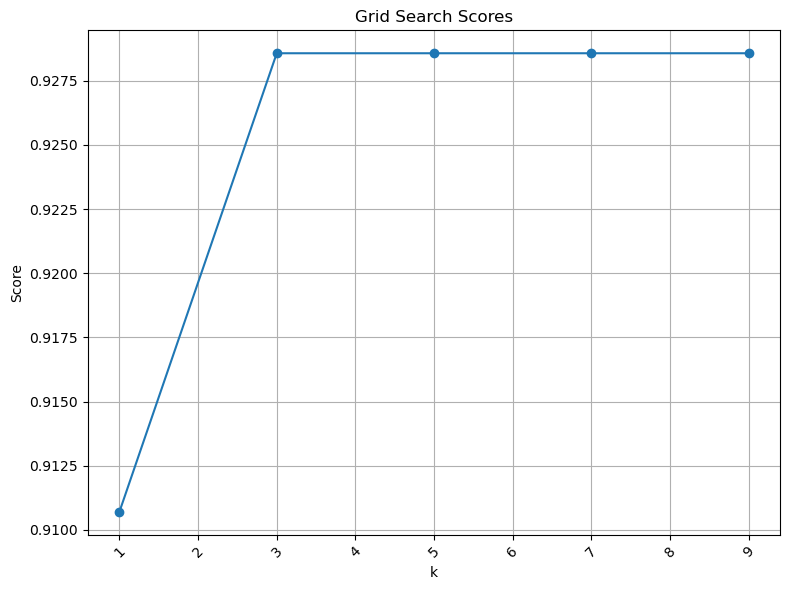

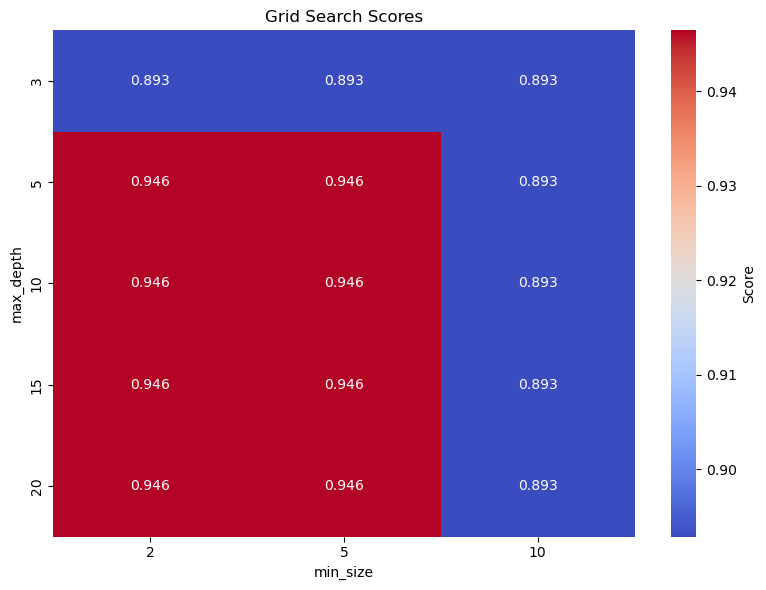

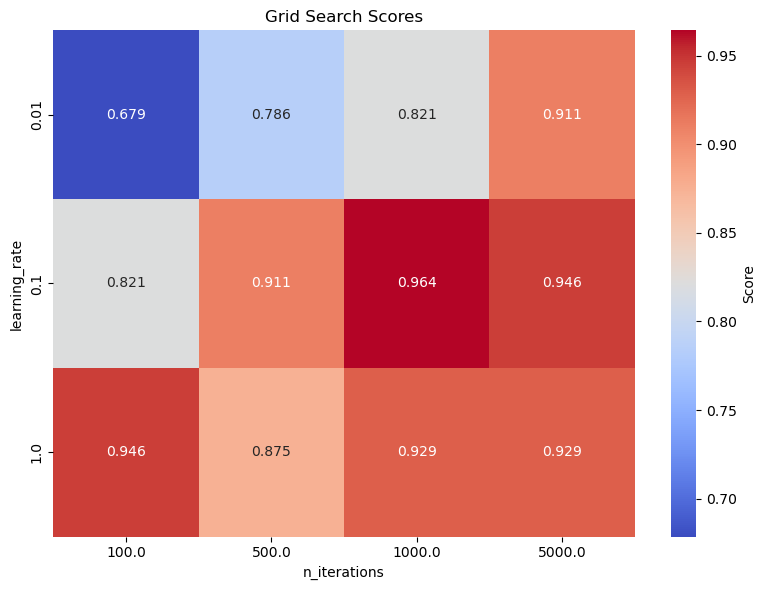

In [7]:
knn_grid_search.plot_param_grid_heatmap()
tree_grid_search.plot_param_grid_heatmap()
softmax_grid_search.plot_param_grid_heatmap()
